![alt text](img\logo.png "Title")
<center> <h1> Data Science Technical Test <h1></center>

## Instructions
This assessment intends to evaluate your technical skills. The task has intentionally been
designed to be somewhat open ended to allow you to be propositive.
The dataset that must be used for this evaluation is found in the document attached. You
must address the requirements described in the deliverable description. You will also have to
present your work in a meeting

## Data extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv('dataset\Dataset for data_scientist test.txt', delimiter = ",")

In [3]:
df

,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label
0,na,2003-04-06,-0.90,-3.82,1,19,happy,blue,0.37,3.92,2.5
1,UV7055,2013-08-22,-0.35,2.23,5,13,surprised,green,0.05,0.60,3.19
2,oM1806,2002-10-10,0.93,-12.12,2,11,happy,green,0.08,0.75,2.33
3,YJ8175,2015-01-01,1.23,-7.21,1,14,scared,purple,-0.69,-7.24,2.54
4,VF7543,2014-03-03,-1.87,-9.02,3,9,happy,blue,1.01,11.16,2.1
...,...,...,...,...,...,...,...,...,...,...,...
995,SW6268,2001-11-30,-0.42,-18.36,2,16,scared,orange,2.70,23.41,3.49
996,QR0417,2010-02-04,-1.85,-8.99,1,9,surprised,green,-1.12,-9.16,1.27
997,UI7021,2009-05-02,-0.96,-19.40,0,0,surprised,blue,-1.71,-16.33,na
998,QH8767,2001-02-01,-0.77,2.73,3,19,surprised,orange,2.06,21.55,na


### Features description

In [4]:
def minMax(x):
    return pd.Series(index=['min','max'], data=[x.min(), x.max()])


df.apply(minMax)

,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cat_7,cat_8,cont_9,cont_10,label
min,AD3812,2000-01-03,-3.22,-31.75,0,0,happy,blue,-2.99,-35.35,0.99
max,zq5501,2020-12-31,3.32,33.77,5,na,surprised,yellow,3.00,35.20,na


In [5]:
df.cat_7.unique()

array(['happy', 'surprised', 'scared', 'sad'], dtype=object)

In [6]:
df.cat_8.unique()

array(['blue', 'green', 'purple', 'orange', 'yellow', 'red'], dtype=object)



In this problem we don't have enough information about the business problem, so we need to try to find the most information we could from the dataset. Following there are the suppositions about the features of the dataset we found.

- key_1: this is the primary key and is alphanumeric
- date_2: this is the date of the record.
- cont_3: this a continue variable with values in a range of -3.22 and 3.22
- cont_4: this a continue variable with values in a range of -31.75 and 33.77
- disc_5: this a discrete variable with values in a range of 0 and 5
- disc_6: this a discrete variable with values in a range of 0 and 21
- cat_7: this a categorical variable with values: 'happy', 'surprised', 'scared', 'sad'
- cat_8: this a categorical variable with values: 'blue', 'green', 'purple', 'orange', 'yellow', 'red'
- cont_9: this a continue variable with values in a range of -2.99 and 3
- cont_10: this a continue variable with values in a range of -35.35 and 35.20
- label: this is the indepent variable in our dataset and what we want to predict

## Data preparation

We need to verify the data types of our features and fix them if they aren't correct

In [7]:
df.dtypes

key_1       object
date_2      object
cont_3     float64
cont_4     float64
disc_5       int64
disc_6      object
cat_7       object
cat_8       object
cont_9     float64
cont_10    float64
label       object
dtype: object

date_2, disc_6, and label don't have the correct data type, let's fix this.

In [8]:
#converting to correct data type
df['date_2'] = df['date_2'].astype('datetime64[ns]')
df['disc_6'] = pd.to_numeric(df['disc_6'], errors='coerce')
#we can't convert to int if we have NAN values, so we need to drop them
df = df.dropna(subset=['disc_6'])
df['disc_6'] = df['disc_6'].astype('int')
df['label'] = pd.to_numeric(df['label'], errors='coerce')
df = df.dropna(subset=['label'])
df.dtypes

<ipython-input-8-87b8775dbb93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['disc_6'] = df['disc_6'].astype('int')
<ipython-input-8-87b8775dbb93>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = pd.to_numeric(df['label'], errors='coerce')


key_1              object
date_2     datetime64[ns]
cont_3            float64
cont_4            float64
disc_5              int64
disc_6              int32
cat_7              object
cat_8              object
cont_9            float64
cont_10           float64
label             float64
dtype: object

Check for Null values in the DataFrame:

In [9]:
df.isnull().values.any()

False

## Data transformation

Since computers are unable to process categorical data as these categories have no meaning for them, this information has to be prepared if we want a computer to be able to process it. We are going to use One-Hot Encoding.

One-Hot Encoding for cat_7

In [10]:
# Get one hot encoding of columns cat_7
one_hot = pd.get_dummies(df['cat_7'])
# Drop column cat_7 as it is now encoded
df = df.drop('cat_7',axis = 1)
# Join the encoded df
df = df.join(one_hot)

One-Hot Encoding for cat_8

In [11]:
# Get one hot encoding of columns cat_8
one_hot = pd.get_dummies(df['cat_8'])
# Drop column cat_8 as it is now encoded
df = df.drop('cat_8',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head()

,key_1,date_2,cont_3,cont_4,disc_5,disc_6,cont_9,cont_10,label,happy,sad,scared,surprised,blue,green,orange,purple,red,yellow
0,na,2003-04-06,-0.90,-3.82,1,19,0.37,3.92,2.50,1,0,0,0,1,0,0,0,0,0
1,UV7055,2013-08-22,-0.35,2.23,5,13,0.05,0.60,3.19,0,0,0,1,0,1,0,0,0,0
2,oM1806,2002-10-10,0.93,-12.12,2,11,0.08,0.75,2.33,1,0,0,0,0,1,0,0,0,0
3,YJ8175,2015-01-01,1.23,-7.21,1,14,-0.69,-7.24,2.54,0,0,1,0,0,0,0,1,0,0
4,VF7543,2014-03-03,-1.87,-9.02,3,9,1.01,11.16,2.10,1,0,0,0,1,0,0,0,0,0


#### Robust Scaling
It is common to scale data prior to fitting a machine learning model this is because many machine learning algorithms perform better when numerical input variables are scaled to a standard range. 

In [12]:
#instanstiate the robust scaler
robust_scaler = RobustScaler()

#Create a datframe from the dependent variables, we drop key_1 and date_2 because they don't add information in these case
X = df.drop(['key_1', 'date_2', 'label'], axis=1)

# perform a robust scaler transform of the dataset
X = robust_scaler.fit_transform(X)

#### Create the dataframes for train and test

In [13]:
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)

#### Preparing a dataframe for model analysis

For continuous-valued estimation problems, metrics often used for assessing models are R^2, average error, Mean Squared Error (MSE), median error, average absolute error, and median absolute error. Because we don't know the much about the business goals and for brevity sake we are going to use us R^2 which is one of the most popular metrics for this case.

The formula for R-Squared is as follows:
![r2 formula](img\r2_1.png)
![r2 formula](img\r2_2.png)

MSE(model): Mean Squared Error of the predictions against the actual values

MSE(baseline): Mean Squared Error of  mean prediction against the actual values

In other words how good our regression model as compared to a very simple model that just predicts the mean value of target from the train set as predictions.

In [14]:
#Data frame for evaluation metrics
metrics = pd.DataFrame(index=['R2'],
                      columns=['LinearRegression', 'ClassTree', 'RandomForest', 'GradientBoosting','NeuralNetwork'])

## Model training

A typical question asked by a beginner, is "which algorithm should I use?". The answer to the question varies depending on many factors, including:

- The size, quality, and nature of data.
- The available computational time.
- The urgency of the task.
- What you want to do with the data.

We are going to use the The machine learning algorithm cheat sheet to help us to choose from a variety of machine learning algorithms and find the appropriate algorithm for our specific problem.

[The machine learning algorithm cheat sheet](https://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet-2.png).

From the cheat sheet, we choose to use five algorithms for this problem
- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting regression
- Neural Network

### A. Linear Regression

In [15]:
# 1. import the predicitive model
from sklearn import linear_model

# 2. create instace of the model
regr = linear_model.LinearRegression()

# 3. use the trainning data to train the model
regr.fit(X_train, y_train)

# 4. evaluate the model
y_pred_test = regr.predict(X_test)
metrics.loc['R2', 'LinearRegression'] = r2_score(y_test, y_pred_test)

### B. Decision Tree

In [16]:
# 1. import the regressor
from sklearn.tree import DecisionTreeRegressor 

# 2. create instace of the regressor object
treeRegressor = DecisionTreeRegressor(random_state = 0) 

# 3. use the trainning data to train the model
treeRegressor.fit(X_train, y_train)

# 4. evaluate the model
y_pred_test = treeRegressor.predict(X_test)
metrics.loc['R2', 'ClassTree'] = r2_score(y_test, y_pred_test)

### C. Random Forest

In [17]:
# 1. import the regressor
from sklearn.ensemble import RandomForestRegressor

# 2. instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)

# 3. use the trainning data to train the model
rf.fit(X_train, y_train)

# 4. evaluate the model
y_pred_test = rf.predict(X_test)
metrics.loc['R2', 'RandomForest'] = r2_score(y_test, y_pred_test)

### D. Gradient Boosting regression

In [18]:
# 1. import the regressor
from sklearn.ensemble import GradientBoostingRegressor

# 2. instantiate model with 1000 decision trees
gbReg = GradientBoostingRegressor(n_estimators= 1000,
                                max_depth= 4,
                                min_samples_split= 5,
                                learning_rate= 0.01,
                                loss= 'ls',
                                random_state=0)

# 3. use the trainning data to train the model
gbReg.fit(X_train, y_train)

# 4. evaluate the model
y_pred_test = gbReg.predict(X_test)
metrics.loc['R2', 'GradientBoosting'] = r2_score(y_test, y_pred_test)

### E. Neural Network

In [19]:
# 1. import the regressor
from sklearn.neural_network import MLPRegressor

# 2. create instace of the regressor
mlp = MLPRegressor(solver='lbfgs', 
                   hidden_layer_sizes=50, 
                   max_iter=1000, 
                   learning_rate='constant', 
                   random_state=42)

# 3. use the trainning data to train the model
mlp.fit(X_train, y_train)

# 4. evaluate the model
y_pred_test = mlp.predict(X_test)
metrics.loc['R2', 'NeuralNetwork'] = r2_score(y_test, y_pred_test)

### Compare the models

In [20]:
metrics

,LinearRegression,ClassTree,RandomForest,GradientBoosting,NeuralNetwork
R2,0.827165,0.773129,0.905996,0.954824,0.93969


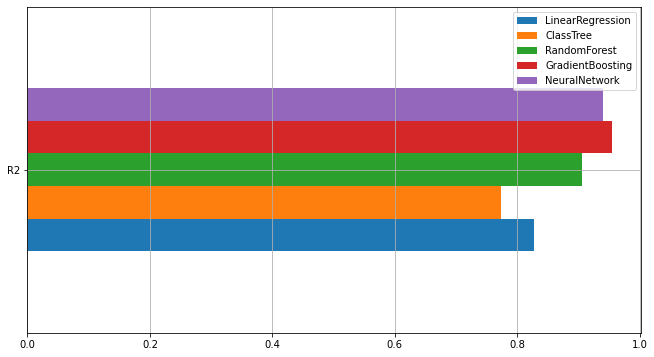

In [21]:
fig, ax = plt.subplots(figsize=(11,6))
metrics.plot(kind='barh', ax = ax)
ax.grid()

As we see from the graph the Gradient Boosting Regressor is the best.

Note: We adjusted the parameters of the model trying to find the best performance, we don't include this stage in the notebook due to we didn't know what are the KPI from the business, and we just did a manual try and error in this case.

## Model prediction

### Save the model to disk

In [22]:
filename = 'finalized_model.sav'
model = gbReg
pickle.dump(model, open(filename, 'wb'))

### Load the model and use it to make predictions

In [23]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

#Create a function to make individual pedictions
def make_ind_predition(new_data):
    data = new_data
    
    cat_7_dict = {'happy': 0, 'surprised': 1, 'scared': 2, 'sad': 3}    
    cat_7 = pd.get_dummies(pd.Series(['happy', 'surprised', 'scared', 'sad']))
    cat_7_dummies = cat_7.iloc[cat_7_dict[new_data['cat_7']]]
    
    cat_8_dict = {'blue':0, 'green':1, 'purple':2, 'orange':3, 'yellow':4, 'red':5}
    cat_8 = pd.get_dummies(pd.Series(['blue', 'green', 'purple', 'orange', 'yellow', 'red']))
    cat_8_dummies = cat_8.iloc[cat_8_dict[new_data['cat_8']]]
        
    data = pd.concat([data, cat_7_dummies, cat_8_dummies])
    data = data.drop(['cat_7', 'cat_8'])    
    
    data = data.values.reshape(1, -1)
    data = robust_scaler.transform(data)
    prediction = loaded_model.predict(data)
    return prediction

In [24]:
#the result should be close to 2.62
from collections import OrderedDict
new_record = OrderedDict([('cont_3', -0.71),('cont_4', -7.57),
                          ('disc_5', 5),('disc_6', 6),
                          ('cat_7', 'happy'),('cat_8', 'green'),
                          ('cont_9', -0.15),('cont_10', -1.5)])

record = pd.Series(new_record)
make_ind_predition(record)

array([2.54400549])

## Recommendations to the analytics team

- We encourage the use of CSV files instead of plain txt files, CSV files are an standard in the industry.
- We recommend analyzing the null values that came in the original dataset, investigate further why they are missing and try to impute them when is impossible to get the original information.
- We recommend to try to add more samples to our dataset if possible, datasets with few samples can lead to overfitting

Due we don't have more information about the business problem we are trying to solve, we don't have more recommendations